In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA

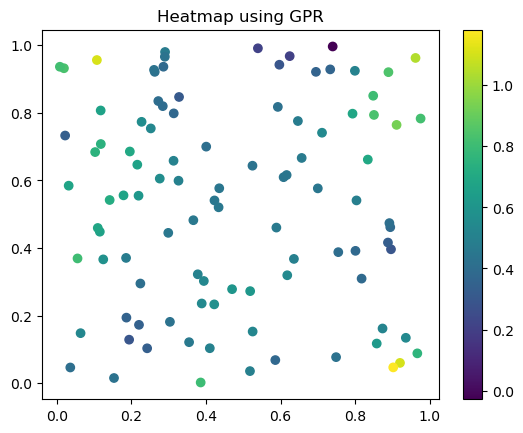

In [10]:
# Sicherstellen, dass das Verzeichnis 'data' existiert
if not os.path.exists('data'):
    os.makedirs('data')

# Beispiel-Funktion zur Erstellung einer Heatmap mit Gaussian Process Regression (GPR)
def create_heatmap_gpr(data):
    gpr = GaussianProcessRegressor()
    gpr.fit(data['coords'], data['values'])
    grid_coords = np.random.rand(100, 2)  # Ersetze dies durch tatsächliche Rasterkoordinaten
    heatmap_values = gpr.predict(grid_coords)
    return grid_coords, heatmap_values

# Beispiel-Datensatz laden (Dummy-Daten)
data = {
    'coords': np.random.rand(100, 2),
    'values': np.random.rand(100)
}

# Heatmap erstellen
grid_coords, heatmap_values = create_heatmap_gpr(data)

# Heatmap visualisieren
plt.scatter(grid_coords[:, 0], grid_coords[:, 1], c=heatmap_values, cmap='viridis')
plt.colorbar()
plt.title('Heatmap using GPR')
plt.show()

# Karte mit Folium anzeigen
m = folium.Map(location=[48.0708, 10.9074], zoom_start=12)
for i, coord in enumerate(grid_coords):
    folium.CircleMarker(
        location=(coord[1], coord[0]),
        radius=5,
        fill=True,
        fill_color='blue',
        color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Sicherstellen, dass das Verzeichnis 'data' existiert
if not os.path.exists('data'):
    os.makedirs('data')

# Heatmap speichern
m.save('data/heatmap.html')
m